In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb

In [4]:
#load data
sarh_data = pd.read_excel("C:/Users/JB/Documents/UKSARH V2.xlsx",sheet_name = "SARH0112")

In [5]:
sarh_data.head(10)

,Date,Day of week,Base,Type of tasking,Tasking location,Tasking outcome,Region,Latitude,Longitude,Time of day,Duration
0,2015-04-01,Wednesday,Sumburgh,Rescue/Recovery,Maritime,Completed,Highlands and Islands,61.466833,1.533500,6.00pm - 8.59pm,2
1,2015-04-01,Wednesday,Sumburgh,Rescue/Recovery,Land,Completed,Highlands and Islands,59.250500,-2.577833,6.00am - 8.59am,2
2,2015-04-01,Wednesday,Inverness,Support,Land,Completed,Highlands and Islands,56.786500,-4.986333,9.00am - 11.59am,3
3,2015-04-01,Wednesday,Inverness,Support,Land,Completed,Highlands and Islands,56.789667,-5.057167,12.00pm - 2.59pm,4
4,2015-04-02,Thursday,Inverness,Rescue/Recovery,Land,Completed,Highlands and Islands,56.805500,-5.018167,6.00pm - 8.59pm,1
5,2015-04-02,Thursday,Sumburgh,Rescue/Recovery,Maritime,Completed,Highlands and Islands,61.366167,1.577333,6.00am - 8.59am,2
6,2015-04-02,Thursday,Lee On Solent,Search only,Coast,Completed,South East,51.103500,1.269833,12.00pm - 2.59pm,3
7,2015-04-02,Thursday,Lee On Solent,Aborted/Not Required,Land,Aborted,South East,50.683333,-1.283500,6.00pm - 8.59pm,0
8,2015-04-03,Friday,Lee On Solent,Pre-arranged transfer,Land,Completed,South East,50.711167,-1.297167,12.00pm - 2.59pm,1
9,2015-04-03,Friday,Lee On Solent,Pre-arranged transfer,Land,Completed,South East,50.711167,-1.297167,3.00pm - 5.59pm,0


Now we remove the data from before April 2017 as the recording parameters changed: **"Since April 2016, there has been an update to the methodology of the tasking category data including a more thorough breakdown of the type of tasking the base responded to, such as whether the tasking was aborted, complete or stood down."** Furthermore we remove Portland as this base is no longer operational.

In [6]:
sarh_data['Date'] = pd.to_datetime(sarh_data['Date'],errors='coerce')
updated_sarh_data = sarh_data[sarh_data['Date'] >= '2017-04-01']
updated_sarh_data =updated_sarh_data[updated_sarh_data['Base'] != 'Portland']

In [7]:
updated_sarh_data.head(10)

,Date,Day of week,Base,Type of tasking,Tasking location,Tasking outcome,Region,Latitude,Longitude,Time of day,Duration
4274,2017-04-01,Saturday,Prestwick,Rescue/Recovery,Land,Supported & Completed,Eastern Scotland,56.1935,-4.3829,12.00pm - 2.59pm,1
4275,2017-04-01,Saturday,Lydd,Search only,Maritime,Terminated On Scene,South East,50.5558,0.4730,3.00pm - 5.59pm,0
4276,2017-04-01,Saturday,St Athan,Rescue/Recovery,Land,Supported & Completed,South West,51.0204,-4.1548,9.00am - 11.59am,1
4277,2017-04-01,Saturday,Caernarfon,Rescue/Recovery,Land,Supported & Completed,Wales,53.0651,-4.0129,12.00pm - 2.59pm,1
4278,2017-04-01,Saturday,Caernarfon,Search only,Coast,Terminated En Route,Wales,53.3200,-4.6813,6.00pm - 8.59pm,0
4279,2017-04-01,Saturday,Lee On Solent,Rescue/Recovery,Maritime,Supported & Completed,South East,50.2618,-0.2636,9.00am - 11.59am,1
4280,2017-04-01,Saturday,Lee On Solent,Pre-arranged Transfer,Land,Supported & Completed,East of England,52.5602,1.7150,3.00pm - 5.59pm,5
4282,2017-04-02,Sunday,Stornoway,Rescue/Recovery,Maritime,Supported & Completed,Highlands and Islands,57.3660,-8.5260,3.00pm - 5.59pm,5
4283,2017-04-02,Sunday,Prestwick,Search only,Maritime,Supported & Completed,North East,55.3844,-1.3749,9.00am - 11.59am,2
4284,2017-04-02,Sunday,Prestwick,Search only,Maritime,Supported & Completed,Northern Ireland,54.4291,-5.3408,3.00pm - 5.59pm,1


In [8]:
#nas and duplicates
updated_sarh_data.dropna(inplace= True)
updated_sarh_data.drop_duplicates(inplace=True)

In [9]:
updated_sarh_data.head(10)

,Date,Day of week,Base,Type of tasking,Tasking location,Tasking outcome,Region,Latitude,Longitude,Time of day,Duration
4274,2017-04-01,Saturday,Prestwick,Rescue/Recovery,Land,Supported & Completed,Eastern Scotland,56.1935,-4.3829,12.00pm - 2.59pm,1
4275,2017-04-01,Saturday,Lydd,Search only,Maritime,Terminated On Scene,South East,50.5558,0.4730,3.00pm - 5.59pm,0
4276,2017-04-01,Saturday,St Athan,Rescue/Recovery,Land,Supported & Completed,South West,51.0204,-4.1548,9.00am - 11.59am,1
4277,2017-04-01,Saturday,Caernarfon,Rescue/Recovery,Land,Supported & Completed,Wales,53.0651,-4.0129,12.00pm - 2.59pm,1
4278,2017-04-01,Saturday,Caernarfon,Search only,Coast,Terminated En Route,Wales,53.3200,-4.6813,6.00pm - 8.59pm,0
4279,2017-04-01,Saturday,Lee On Solent,Rescue/Recovery,Maritime,Supported & Completed,South East,50.2618,-0.2636,9.00am - 11.59am,1
4280,2017-04-01,Saturday,Lee On Solent,Pre-arranged Transfer,Land,Supported & Completed,East of England,52.5602,1.7150,3.00pm - 5.59pm,5
4282,2017-04-02,Sunday,Stornoway,Rescue/Recovery,Maritime,Supported & Completed,Highlands and Islands,57.3660,-8.5260,3.00pm - 5.59pm,5
4283,2017-04-02,Sunday,Prestwick,Search only,Maritime,Supported & Completed,North East,55.3844,-1.3749,9.00am - 11.59am,2
4284,2017-04-02,Sunday,Prestwick,Search only,Maritime,Supported & Completed,Northern Ireland,54.4291,-5.3408,3.00pm - 5.59pm,1


Next we check the uniqeness of the categorical vars. ***Type of Tasking*** is easy to change as it is a simple case of capital letters being not used. However ***Tasking Outcome*** is a complete mess adn is not something I am going to attepmt to clean up at this very moment, a lesson for data collection! 

In [10]:
updated_sarh_data['Type of tasking'].unique()

array(['Rescue/Recovery', 'Search only', 'Pre-arranged Transfer',
       'Support', 'Pre-arranged transfer', 'Search Only'], dtype=object)

In [11]:
updated_sarh_data['Type of tasking'] = updated_sarh_data['Type of tasking'].replace({
    'Search only': 'Search Only',
    'Pre-arranged transfer': 'Pre-arranged Transfer'
})

In [12]:
updated_sarh_data['Tasking outcome'].unique()

array(['Supported & Completed', 'Terminated On Scene',
       'Terminated En Route', 'Diverted / Suspended',
       'Terminated Prior to Launch', 'Cancelled', 'Declined',
       'Mission Planning / ARCC Actions Only', 'Terminated on Scene',
       'Terminated en Route', 'Terminated on scene', 'Other',
       'terminated en route', 'Terminated en route',
       'Terminated prior to launch'], dtype=object)

For each base add the coordinates, type and callsigns. Luckily I have this code in R so can just copy the details into a array and then iterate over it. Example R Code: **Caernarfon <- mutate(filter(SARH_2015_2021, base =="Caernarfon"), HeliType = "S92", BLat = 53.100824, BLong = -4.335326,callsign="936")**


In [13]:
base_locations = {
    'Caernarfon': {'HeliType': 'S92', 'BLat': 53.100824, 'BLong': -4.335326, 'callsign': '936'},
    'Humberside': {'HeliType': 'S92', 'BLat': 53.576608, 'BLong': -0.338628, 'callsign': '912'},
    'Inverness': {'HeliType': 'AW189', 'BLat': 57.538000, 'BLong': -4.047985, 'callsign': '151'},
    'Lee On Solent': {'HeliType': 'AW189', 'BLat': 50.811413, 'BLong': -1.208161, 'callsign': '175'},
    'Lydd': {'HeliType': 'AW189', 'BLat': 50.958359, 'BLong': 0.933960, 'callsign': '163'},
    'Newquay': {'HeliType': 'S92', 'BLat': 50.443431, 'BLong': -4.993911, 'callsign': '924'},
    'Prestwick': {'HeliType': 'AW189', 'BLat': 55.511174, 'BLong': -4.581976, 'callsign': '199'},
    'St Athan': {'HeliType': 'AW189', 'BLat': 51.400839, 'BLong': -3.439028, 'callsign': '187'},
    'Stornoway': {'HeliType': 'S92', 'BLat': 58.219136, 'BLong': -6.326690, 'callsign': '948'},
    'Sumburgh': {'HeliType': 'S92', 'BLat': 59.876695, 'BLong': -1.296892, 'callsign': '900'}
}

for base, info in base_locations.items():
    mask = updated_sarh_data['Base'] == base
    for key, value in info.items():
        updated_sarh_data.loc[mask, key] = value

In [14]:
updated_sarh_data.head(10)

,Date,Day of week,Base,Type of tasking,Tasking location,Tasking outcome,Region,Latitude,Longitude,Time of day,Duration,HeliType,BLat,BLong,callsign
4274,2017-04-01,Saturday,Prestwick,Rescue/Recovery,Land,Supported & Completed,Eastern Scotland,56.1935,-4.3829,12.00pm - 2.59pm,1,AW189,55.511174,-4.581976,199
4275,2017-04-01,Saturday,Lydd,Search Only,Maritime,Terminated On Scene,South East,50.5558,0.4730,3.00pm - 5.59pm,0,AW189,50.958359,0.933960,163
4276,2017-04-01,Saturday,St Athan,Rescue/Recovery,Land,Supported & Completed,South West,51.0204,-4.1548,9.00am - 11.59am,1,AW189,51.400839,-3.439028,187
4277,2017-04-01,Saturday,Caernarfon,Rescue/Recovery,Land,Supported & Completed,Wales,53.0651,-4.0129,12.00pm - 2.59pm,1,S92,53.100824,-4.335326,936
4278,2017-04-01,Saturday,Caernarfon,Search Only,Coast,Terminated En Route,Wales,53.3200,-4.6813,6.00pm - 8.59pm,0,S92,53.100824,-4.335326,936
4279,2017-04-01,Saturday,Lee On Solent,Rescue/Recovery,Maritime,Supported & Completed,South East,50.2618,-0.2636,9.00am - 11.59am,1,AW189,50.811413,-1.208161,175
4280,2017-04-01,Saturday,Lee On Solent,Pre-arranged Transfer,Land,Supported & Completed,East of England,52.5602,1.7150,3.00pm - 5.59pm,5,AW189,50.811413,-1.208161,175
4282,2017-04-02,Sunday,Stornoway,Rescue/Recovery,Maritime,Supported & Completed,Highlands and Islands,57.3660,-8.5260,3.00pm - 5.59pm,5,S92,58.219136,-6.326690,948
4283,2017-04-02,Sunday,Prestwick,Search Only,Maritime,Supported & Completed,North East,55.3844,-1.3749,9.00am - 11.59am,2,AW189,55.511174,-4.581976,199
4284,2017-04-02,Sunday,Prestwick,Search Only,Maritime,Supported & Completed,Northern Ireland,54.4291,-5.3408,3.00pm - 5.59pm,1,AW189,55.511174,-4.581976,199


To start with developing a stress score, I want to encode the type tasking using ordinal encoding. Then calculate the distance from each base to the tasking location by using the haversine formula. Then define the $severity = type + distance * (duration + 1)$ then the overall stress for each time period will be $stress = \sum_{i=1}^{n}severity_{i}$ where $n$ is the number of observations in each time block

In [15]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a =np.sin(dlat / 2)** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    r = 6371 #kilometres
    return c * r

In [18]:
updated_sarh_data['Latitude'] = updated_sarh_data['Latitude'].astype(float)  # to float
updated_sarh_data['Longitude'] = updated_sarh_data['Longitude'].astype(float)  

updated_sarh_data['Distance_km'] = updated_sarh_data.apply(
    lambda row: haversine(row['BLat'], row['BLong'], row['Latitude'], row['Longitude']), axis=1) #apply function rowise

In [20]:
updated_sarh_data.head(10)

,Date,Day of week,Base,Type of tasking,Tasking location,Tasking outcome,Region,Latitude,Longitude,Time of day,Duration,HeliType,BLat,BLong,callsign,Distance_km
4274,2017-04-01,Saturday,Prestwick,Rescue/Recovery,Land,Supported & Completed,Eastern Scotland,56.1935,-4.3829,12.00pm - 2.59pm,1,AW189,55.511174,-4.581976,199,76.881865
4275,2017-04-01,Saturday,Lydd,Search Only,Maritime,Terminated On Scene,South East,50.5558,0.4730,3.00pm - 5.59pm,0,AW189,50.958359,0.933960,163,55.272561
4276,2017-04-01,Saturday,St Athan,Rescue/Recovery,Land,Supported & Completed,South West,51.0204,-4.1548,9.00am - 11.59am,1,AW189,51.400839,-3.439028,187,65.387201
4277,2017-04-01,Saturday,Caernarfon,Rescue/Recovery,Land,Supported & Completed,Wales,53.0651,-4.0129,12.00pm - 2.59pm,1,S92,53.100824,-4.335326,936,21.898156
4278,2017-04-01,Saturday,Caernarfon,Search Only,Coast,Terminated En Route,Wales,53.3200,-4.6813,6.00pm - 8.59pm,0,S92,53.100824,-4.335326,936,33.537390
4279,2017-04-01,Saturday,Lee On Solent,Rescue/Recovery,Maritime,Supported & Completed,South East,50.2618,-0.2636,9.00am - 11.59am,1,AW189,50.811413,-1.208161,175,90.504295
4280,2017-04-01,Saturday,Lee On Solent,Pre-arranged Transfer,Land,Supported & Completed,East of England,52.5602,1.7150,3.00pm - 5.59pm,5,AW189,50.811413,-1.208161,175,279.997209
4282,2017-04-02,Sunday,Stornoway,Rescue/Recovery,Maritime,Supported & Completed,Highlands and Islands,57.3660,-8.5260,3.00pm - 5.59pm,5,S92,58.219136,-6.326690,948,161.196571
4283,2017-04-02,Sunday,Prestwick,Search Only,Maritime,Supported & Completed,North East,55.3844,-1.3749,9.00am - 11.59am,2,AW189,55.511174,-4.581976,199,202.726679
4284,2017-04-02,Sunday,Prestwick,Search Only,Maritime,Supported & Completed,Northern Ireland,54.4291,-5.3408,3.00pm - 5.59pm,1,AW189,55.511174,-4.581976,199,129.701208


In [22]:
tasking_order = ['Support', 'Pre-arranged Transfer', 'Search Only', 'Rescue/Recovery']

ordinal_encoder = OrdinalEncoder(categories= [tasking_order])

updated_sarh_data['Type of tasking_encoded'] = ordinal_encoder.fit_transform(updated_sarh_data[['Type of tasking']])

In [25]:
updated_sarh_data.head(3)

,Date,Day of week,Base,Type of tasking,Tasking location,Tasking outcome,Region,Latitude,Longitude,Time of day,Duration,HeliType,BLat,BLong,callsign,Distance_km,Type of tasking_encoded
4274,2017-04-01,Saturday,Prestwick,Rescue/Recovery,Land,Supported & Completed,Eastern Scotland,56.1935,-4.3829,12.00pm - 2.59pm,1,AW189,55.511174,-4.581976,199,76.881865,3.0
4275,2017-04-01,Saturday,Lydd,Search Only,Maritime,Terminated On Scene,South East,50.5558,0.4730,3.00pm - 5.59pm,0,AW189,50.958359,0.933960,163,55.272561,2.0
4276,2017-04-01,Saturday,St Athan,Rescue/Recovery,Land,Supported & Completed,South West,51.0204,-4.1548,9.00am - 11.59am,1,AW189,51.400839,-3.439028,187,65.387201,3.0


In [29]:
updated_sarh_data['Severity'] = updated_sarh_data['Type of tasking_encoded'] +((updated_sarh_data['Duration'] +1) * updated_sarh_data['Distance_km'])

In [30]:
updated_sarh_data.head(3)

,Date,Day of week,Base,Type of tasking,Tasking location,Tasking outcome,Region,Latitude,Longitude,Time of day,Duration,HeliType,BLat,BLong,callsign,Distance_km,Type of tasking_encoded,Severity
4274,2017-04-01,Saturday,Prestwick,Rescue/Recovery,Land,Supported & Completed,Eastern Scotland,56.1935,-4.3829,12.00pm - 2.59pm,1,AW189,55.511174,-4.581976,199,76.881865,3.0,156.763730
4275,2017-04-01,Saturday,Lydd,Search Only,Maritime,Terminated On Scene,South East,50.5558,0.4730,3.00pm - 5.59pm,0,AW189,50.958359,0.933960,163,55.272561,2.0,57.272561
4276,2017-04-01,Saturday,St Athan,Rescue/Recovery,Land,Supported & Completed,South West,51.0204,-4.1548,9.00am - 11.59am,1,AW189,51.400839,-3.439028,187,65.387201,3.0,133.774402


In [62]:
updated_sarh_data['Time of day '] = updated_sarh_data['Time of day '].str.replace('.', ':')

stress_scores= updated_sarh_data.groupby(['Date',  'Time of day '])['Severity'].sum().reset_index()

stress_scores.rename(columns={'Severity_Score': 'Stress_Score'}, inplace=True)

C:\Users\JB\AppData\Local\Temp/ipykernel_13832/1696457726.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  updated_sarh_data['Time of day '] = updated_sarh_data['Time of day '].str.replace('.', ':')


In [63]:
stress_scores

,Date,Time of day,Severity
0,2017-04-01,12:00pm - 2:59pm,203.560042
1,2017-04-01,3:00pm - 5:59pm,1738.255816
2,2017-04-01,6:00pm - 8:59pm,35.537390
3,2017-04-01,9:00am - 11:59am,317.782992
4,2017-04-02,12:00pm - 2:59pm,1329.220567
...,...,...,...
10413,2024-03-31,12:00am - 2:59am,468.179714
10414,2024-03-31,12:00pm - 2:59pm,395.380069
10415,2024-03-31,6:00am - 8:59am,782.894094
10416,2024-03-31,6:00pm - 8:59pm,482.478018


Now we can add the predictor variables, to start with I want to try the following: day of the week, time of day, the last 8 lagged values and a 8 unit moving average 

In [68]:
# day of week 
stress_scores['DayOfWeek'] = pd.to_datetime(stress_scores['Date']).dt.dayofweek

#time of day  
time_of_day_order = ['12:00am - 2:59am', '3:00am - 5:59am', '6:00am - 8:59am', '9:00am - 11:59am',
                     '12:00pm - 2:59pm', '3:00pm - 5:59pm', '6:00pm - 8:59pm', '9:00pm - 11:59pm']
ordinal_encoder = OrdinalEncoder(categories =[time_of_day_order])
stress_scores['TimeofDay_Encoded'] = ordinal_encoder.fit_transform(stress_scores[['Time of day ']])

# 7 lags 
stress_scores = stress_scores.sort_values(by=['Date', 'TimeofDay_Encoded'])
stress_scores['Lag1'] = stress_scores['Severity'].shift(1)
stress_scores['Lag2'] = stress_scores['Severity'].shift(2)
stress_scores['Lag3'] = stress_scores['Severity'].shift(3)
stress_scores['Lag4'] = stress_scores['Severity'].shift(4)
stress_scores['Lag5'] = stress_scores['Severity'].shift(5)
stress_scores['Lag6'] = stress_scores['Severity'].shift(6)
stress_scores['Lag7'] = stress_scores['Severity'].shift(7)
stress_scores['Lag8'] = stress_scores['Severity'].shift(8)


#ma
stress_scores['MA8'] = stress_scores['Severity'].shift(-1).rolling(window= 8).mean()

#nadrop
stress_scores.dropna(inplace=True)

In [69]:
stress_scores

,Date,Time of day,Severity,DayOfWeek,TimeofDay_Encoded,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,MA8
7,2017-04-02,6:00pm - 8:59pm,110.977354,6,6.0,1264.271048,1329.220567,610.180037,19.565410,35.537390,1738.255816,203.560042,317.782992,642.552034
9,2017-04-02,9:00pm - 11:59pm,32.408652,6,7.0,110.977354,1264.271048,1329.220567,610.180037,19.565410,35.537390,1738.255816,203.560042,450.534392
10,2017-04-03,12:00am - 2:59am,202.114677,0,0.0,32.408652,110.977354,1264.271048,1329.220567,610.180037,19.565410,35.537390,1738.255816,515.205774
12,2017-04-03,3:00am - 5:59am,552.908447,0,1.0,202.114677,32.408652,110.977354,1264.271048,1329.220567,610.180037,19.565410,35.537390,521.727758
14,2017-04-03,9:00am - 11:59am,71.741283,0,3.0,552.908447,202.114677,32.408652,110.977354,1264.271048,1329.220567,610.180037,19.565410,478.797634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,2024-03-30,9:00pm - 11:59pm,330.242797,5,7.0,73.640706,723.782322,1275.137953,895.700196,749.807207,367.844989,68.206179,491.091295,610.541986
10413,2024-03-31,12:00am - 2:59am,468.179714,6,0.0,330.242797,73.640706,723.782322,1275.137953,895.700196,749.807207,367.844989,68.206179,662.423124
10415,2024-03-31,6:00am - 8:59am,782.894094,6,2.0,468.179714,330.242797,73.640706,723.782322,1275.137953,895.700196,749.807207,367.844989,598.732541
10417,2024-03-31,9:00am - 11:59am,240.282547,6,3.0,782.894094,468.179714,330.242797,73.640706,723.782322,1275.137953,895.700196,749.807207,536.192525


Now for fitting the model using xgboost.

In [73]:
#test and train splkt

X = stress_scores[['DayOfWeek', 'TimeofDay_Encoded', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Lag6', 'Lag7', 'Lag8', 'MA8']]
y = stress_scores['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
#dmatix 
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [75]:
#model parameters 
params = {
    'objective': 'reg:squarederror',  
    'max_depth':6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# train
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

In [77]:
#preds
y_pred = bst.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
{mae, mse}

Now for the conformal prediction. We now have a model $f()$ trained on $x_{train}$. First we predict on the training and define $\hat{y} = f(x_{train})$. Then we can calculate the non-conformity scores,using  a function that measures the disagreement between the prediction output $\hat{y_{i}}$, and the actual value $y_{i}$.In our case we cna just take the absolute value as this is the most simple one, $\alpha_{i} = |\hat{y_{i}} - y_{i}|$. $\alpha_{i}$ are the non-conformity scores which we then take the $1 - \epsilon$ quantile of the non-conformity scores and define this as $q$. The prediction interval for a new input $\bar{x}$ is $f(\bar{x})\pm	q $.

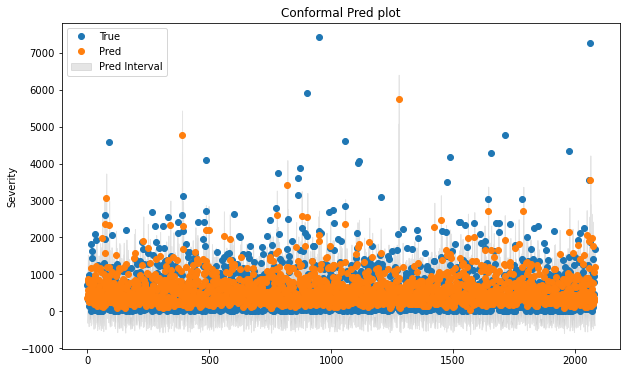

In [115]:
y_train_pred = bst.predict(dtrain)

# nonconformity scores 
nonconformity_scores = np.abs(y_train - y_train_pred)

eps = 0.05
quantile = np.quantile(nonconformity_scores, 1 - eps)

y_test_pred =bst.predict(dtest)

#prediction intervals
lower_bounds = y_test_pred - quantile
upper_bounds = y_test_pred + quantile

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, 'o', label='True')
plt.plot(y_test_pred, 'o' , label='Pred')
plt.fill_between(range(len(y_test)), lower_bounds, upper_bounds, color='grey', alpha=0.2, label='Pred Interval')
plt.ylabel('Severity')
plt.title('Conformal Pred plot')
plt.legend()
plt.show()

The further benfit of conformal prediction is computing the probabilities a predicted value is  g.t or l.t a given threshold t. Having already calculated the non-conformity scores this is very easy. We find the new non-conformity socre $\hat{\alpha} = max(0, t - \hat{y_{new}})$, $t$ us the threshold and $\hat{y_{new}}$ the new prediction. Then: 

$$P(y_{\text{new}} > t) = 1 - \frac{\text{no. non-conformity scores} \leq \hat{\alpha}}{\text{total no. non-conformity scores}}$$


In [113]:
# new data
X_new = X_test.iloc[0].to_frame().T  # Example new data point
dnew = xgb.DMatrix(X_new, feature_names= X_train.columns.tolist())
y_new_pred = bst.predict(dnew)[0]

t = 500  

# non-conformity score 
new_nonconformity = max(0, t - y_new_pred)

probability = np.mean(nonconformity_scores <= new_nonconformity)
print(f"Prob of pred severity score  >  {t} = { 1 - probability}")

Prob of pred severity score  >  500 = 0.5229974780833433


The model is very basic and needs improvement:
- Modify serverity indicator
- Normalisation of predictors
- Feature importance and then re-engineer
- Grid search for paramters 
- k-fold cross validation
- Iterate

However, it shows how conformal prediction can be used to measure uncertainty in the predictions which is far more useful in decision making  than a single point estimator.